BEE 4750 Final Project <br>

Which Alternative is the Right Alternative? <br>
Plastic Reusable vs. Stainless Steel 

In [219]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using JuMP
using HiGHS
using DataFrames
using GraphRecipes
using Plots
using Measures
using MarkdownTables

  Activating project at `~/Downloads`


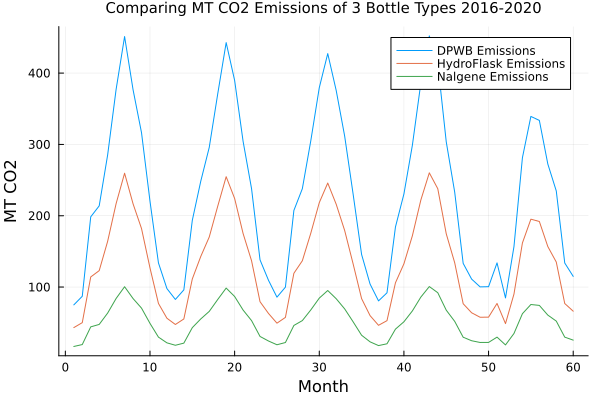

In [220]:
#Carbon Tax imposed per metric ton carbon dioxide equivalent released
C_env = 25; #$/MT

N_env = 0.00031; 
H_env = 0.007;
DPWB_env = 0.0001; 

#Market Price of Nalgene and HydroFlask bottles
C_H = 44.95;
C_N = 16.99;

#Monthly demand for water bottles in 23 participating National Parks from 2016-2020
Grand_Canyon = [189103, 214361, 504295, 464922, 588591, 700421, 839086, 743158, 578006, 517791, 333204, 296873, 217102, 239154,
502739, 590006, 606247, 726916, 837258, 745613, 571946, 529825, 349326, 338106, 257366, 265949, 503284, 549416, 637703, 673474, 799765,
744826, 615783, 555094, 408794, 369041, 225056, 213050, 451228, 562265, 618598, 643821, 756860, 700896,578852, 551558, 347847, 324380,
246460, 252897, 276002,0,43397, 232267, 350003,303900, 249010, 421568, 275764, 245830];

Zion = [84145, 117510, 359920, 395768, 447976, 544890, 599961,477507, 497825, 412916, 232271, 124438, 88561,
110569, 345476, 515652, 509017, 533252, 576349, 529684, 512940, 422377, 222069, 138866, 107960, 127790, 373523, 
483487, 500118, 541464, 500350, 459415, 481507, 377826, 218799, 147794, 98828, 102269, 296316, 372349, 529553,
594896, 629802, 535322,497443, 429604,230180, 171706, 126994, 133718, 207400, 40396, 178194, 377425, 449518, 450183, 520987, 559342, 319853,
227244];

Saguaro = [88923, 103376, 118125, 83290, 57396, 37587, 40050, 42248, 38865, 51086, 67524, 91956, 106868, 129417, 139654, 99335, 61633, 45316,
51672, 56232, 43075, 59768, 81806, 89984, 104478, 131262, 152999, 98936, 62140, 42723, 49881, 49400, 43637, 62855, 96302, 62792, 48968, 
149371, 186275, 117802, 75838, 49481, 48553, 51309, 44812, 64529, 87053, 96235, 124069, 146224, 98901, 22820, 22300, 20362, 25649, 24301, 
23934, 37950, 52377, 163339];

Cape_Hatteras = [56772, 65176, 127642, 143142, 230909, 350934, 424324, 373493, 295304, 153221, 130408, 60386, 60060, 56203, 121172, 196460,
218542, 359142, 390609, 335902, 277372, 199300, 140625, 78316, 60934, 76818, 179199, 175377, 249091, 389722, 405038, 387698, 250105, 201269,
135634, 80171, 72767, 72796, 135597, 205590, 263356, 384260, 438846, 398662, 242139, 188710, 122516, 81393, 81916, 76105, 109749, 69422, 
208837, 399364, 451849, 387379, 345294, 259618, 167925, 91064];

San_Antonio_Missions = [69751, 67846, 147932, 131285, 103841, 117799,181899,104687, 125991, 124204, 98525, 85151, 95001, 104508, 127249, 
144939, 153083, 99035, 145519, 112161,95143, 138253, 73754, 92738, 70801, 90771, 112484, 113304, 152849, 111299, 107976, 92287, 109280,
88995, 81817, 76241, 98469, 92155, 131454, 106123, 73066, 156241, 78215, 141464,106664, 108959, 88251, 100060, 85033, 102213, 74143, 85206,
90586, 98368, 136665, 101728, 99737, 90261, 81455, 95958];

Bryce_Canyon = [24285, 34330, 92080, 137698, 292369, 380354, 384390, 365738, 366702, 180925, 67714, 38525, 27774, 32979, 82110, 153242, 330743,
376786, 416608, 403964, 380586, 243118, 74761, 49013, 32433, 37132, 95204, 185282, 340351, 409467, 430020, 393821, 411456, 227297, 73053,
43962, 36860, 29813, 75853, 207061, 327975, 398290, 401970, 383458, 392428, 232094, 65748, 43354, 107683, 38890, 45132, 3223, 69579, 195463, 
227563, 210153, 280398, 228770, 80618, 52122];

Fort_Sumter = [39350, 45086, 104243, 96260, 86496, 97178, 120910, 90158, 58815, 43765, 53219, 52850, 41500, 49595, 91929, 106221, 84376, 98084,
109100, 112739, 38824, 63607, 51532, 49062, 31808, 46948, 100656, 109481, 89592, 102552, 122162, 82105, 39101, 53721, 45122, 36632, 39481, 
51578, 83927, 105391, 82685, 100365, 118077, 91702, 36802, 64850, 52629, 50407, 41630, 49075, 30891, 300, 7193, 35148, 37757, 38182, 33095, 
34971, 29129, 27672]; 

Mount_Rainier = [34786, 26655, 28799, 50395, 93828, 187037, 296922, 313699, 195579, 76232, 27114, 25867, 27204, 21557, 22768, 34679, 97809,
189348, 329618, 323130, 195641, 89520, 58164, 26429, 23928, 18782, 29624, 29400, 107122, 219842, 349140, 325914, 191730, 108455, 86310, 28244, 
12933, 11743, 32101, 29632, 106136, 219641, 365200, 378305, 184166, 74355, 48248, 39161, 12164, 6783, 29088, 98, 4900, 105540, 20106, 345496,
195942, 101916, 36523, 42198];

Timpanogos_Cave = [155, 140, 155, 180, 11337, 24180, 27122, 23760, 3710, 248, 150, 124, 155, 140, 155, 360, 5494, 24252, 32795, 29049, 6819, 
1088, 283, 150, 441, 632, 3394, 4416, 8746, 28113, 30739, 27227, 9784, 5852, 1179, 788, 139, 133, 58, 522, 7850, 20572, 29172, 
24420, 11108, 4993, 431, 245, 170, 123, 550, 736, 7689, 20071, 28590, 24359, 11049, 4717, 113, 17];


Fort_Laramie = [828, 880, 1350, 2000, 9122, 8008, 11192, 10568, 7752, 4468, 1112, 164, 232, 785, 992, 2110, 8312, 7768, 10020, 18178, 7718, 
3480, 1040, 878, 625, 550, 1678, 9740, 6680, 7768, 8810, 6100, 5435, 3135, 1145, 748, 394, 475, 837, 1870, 5379, 8701, 13132, 9760, 5679, 
2302, 737, 551, 385, 453, 966, 1956, 5393, 8840, 13002, 10237, 5759, 2114, 568, 500];

Salinas_Pueblo_Missions = [1394, 2522, 2600, 2464, 2903, 3142, 3140, 2979, 3264, 4135, 2205, 1666, 1543, 2597, 3572, 3423, 3788, 3178, 
3542, 2747, 3316, 3783, 2060, 1599, 1615, 1987, 2591, 3000, 4445, 3736, 3712, 3151, 3222, 4006, 2296, 868, 1249, 1536, 2448, 2852, 
3233, 2899, 3479, 3096, 3078, 3362, 1782, 1100, 1241, 1513, 2428, 2779, 3179, 2995, 3482, 3111, 2956, 3296, 1754, 1156];

Pecos = [1012, 1506, 3272, 3451, 3962, 4380, 4591, 4720, 4081, 4347, 2367, 2026, 918, 1624, 3756, 3287, 3894, 4435, 4984, 4128, 4148, 
4192, 2496, 2788, 1349, 1431, 4177, 3330, 4060, 4001, 4737, 4170, 4104, 3996, 2157, 1617, 928, 1130, 2377, 2542, 3708, 4725, 5493, 
5175, 3618, 3342, 1621, 1200, 938, 1148, 2452, 2613, 3735, 4754, 5467, 5191, 3622, 3333, 1606, 1210];

Fort_Raleigh = [5921, 5211, 14458, 17182, 34771, 63592, 55298, 43306, 21074, 17562, 8902, 5090, 5891, 4428, 7517, 14336, 35539, 52355, 
55858, 41092, 23778, 17949, 9950, 6288, 3943, 5972, 11579, 15943, 37807, 49057, 48039, 42799, 14071, 18260, 9044, 4684, 3340, 3628, 6955, 
13683, 25379, 49585, 57716, 52003, 16457, 13396, 8181, 3915, 3337, 3563, 7872, 14117, 24988, 48753, 57466, 52435, 16620, 12716, 7455, 3576];

Canyonlands = [5050, 14360, 47993, 97038, 128507, 111544, 77543, 72813, 94964, 82181, 29856, 14469, 7434, 18698, 65115, 82159, 107756, 
87253, 75465, 78510, 91372, 81386, 33138, 13985, 9575, 14323, 66521, 88731, 106796, 85834, 68150, 74737, 96447, 81353, 35062, 11920, 
7473, 12405, 60550, 91568, 117566, 93056, 84664, 90732, 105685, 86919, 27863, 9700, 7526, 12532, 58219, 98265, 126209, 101154, 
89299, 91398, 110439, 88270, 30778, 12238];


Wright_Brothers = [8479, 7366, 31778, 38761, 50689, 63386, 77123, 75725, 44319, 31283, 18943, 10924, 8440, 10264, 20426, 44419, 45991, 
56891, 69566, 64160, 34135, 31855, 17585, 10512, 4122, 8100, 21600, 35919, 43123, 53965, 62346, 57972, 24829, 27771, 16587, 4335, 5535,
6257, 17957, 35914, 41052, 58912, 77836, 69576, 36771, 28208, 16069, 10852, 5482, 6219, 18667, 36222, 40771, 57684, 76333, 68985, 36495, 
27470, 15268, 10314];

Wind_Cave = [10734, 13785, 24239, 38373, 51752, 114636, 124710, 104543, 78141, 28696, 15994, 11774, 11916, 15543, 24896, 38002, 46204, 
116823, 128984, 103518, 77574, 28696, 15994, 11774, 11916, 15543, 24896, 38002, 46204, 116823, 136829, 128984, 79155, 31128, 15670, 11247, 
10925, 11103, 15858, 24075, 51837, 93736, 137207, 127649, 57225, 22792, 13874, 12273, 11213, 11106, 17705, 26088, 52369, 95294, 
136416, 131023, 59493, 22575, 12470, 10965];


Colorado = [15157, 17465, 27029, 35652, 45125, 42720, 48431, 46967, 40625, 32757, 24609, 14538, 12711, 15334, 30093, 37850, 43431, 39411, 
39320, 40706, 43702, 33922, 21641, 16914, 14295, 14991, 28094, 27368, 45954, 39674, 43882, 41412, 48465, 33397, 21134, 16801, 16590, 18951, 
32604, 40927, 53814, 53089, 54019, 53998, 47496, 37370, 23996, 17687, 16889, 19147, 32955, 41585, 55777, 53421, 55027, 53709, 47966, 37221, 
25129, 17727];


Antietam = [5906, 7372, 22624, 24495, 34306, 41630, 71040, 36373, 33925, 38411, 19152, 16677, 7028, 12909, 16613, 33761, 35212, 39688, 
71294, 41929, 35089, 37229, 20813, 14943, 5552, 6780, 18434, 28906, 34574, 40180, 69234, 35864, 25813, 35209, 17289, 8362, 9283, 11140, 
29142, 33063, 40643, 45496, 72677, 44042, 41500, 39701, 21626, 18226, 9414, 11369, 29980, 34185, 41494, 45979, 73569, 44886, 41872, 39860, 
21757, 18440];

Petrified_Forest = [18776, 23269, 49482, 54262, 59516, 95672, 110214, 71512, 53778, 51338, 30888, 24567, 24592, 21907, 54971, 49474, 61584,
82104, 81984, 76121, 47260, 65029, 33237, 29494, 25215, 27216, 54614, 49638, 73753, 104583, 81520, 64665, 56831, 52420, 29810, 24657, 19249, 
21936, 45186, 49029, 66767, 107853, 114556, 95951, 56507, 54058, 27947, 21305, 19379, 22098, 46852, 50529, 65979, 110462, 115638, 
97701, 57539, 52651, 27838, 21360];

Mammoth_Cave = [11253, 9541, 48508, 54541, 50686, 80641, 119420, 72008, 46909, 52302, 24986, 15719, 9842, 11027, 45290, 60668, 50498, 
82062, 115323, 84608, 41365, 48939, 22779, 15452, 7719, 11148, 49184, 52052, 56309, 74990, 101397, 61888, 44885, 44821, 21140, 7673, 
20576, 19908, 36085, 46007, 56165, 68880, 100101, 81649, 50474, 46164, 29772, 23316, 20706, 19649, 35570, 45918, 53477, 79253, 94398, 
85155, 51155, 43823, 28988, 25366];

Mount_Rushmore = [22307, 29177, 65943, 65094, 207419, 447682, 613723, 455680, 328563, 126018, 46429, 23196, 19330, 28621, 64085, 
77532, 204142, 442749, 623592, 473355, 317146, 117686, 41211, 28351, 22862, 21883, 56244, 57374, 207266, 428499, 589223, 441126, 
316815, 108019, 35118, 26844, 18954, 21825, 39866, 52092, 166172, 429940, 644114, 523652, 268774, 90823, 31727, 23899, 19930, 
22630, 46177, 55952, 174916, 436237, 646154, 526597, 272833, 90139, 30809, 20293];

Arches = [20311, 33200, 119122, 151112, 201718, 211706, 210359, 188340, 200906, 146250, 69404, 33290, 21549, 38248, 128508, 155286, 
188726, 193060, 192767, 177764, 187603, 138325, 72867, 44325, 31810, 40325, 134951, 167156, 215255, 214443, 205493, 183840, 206254, 
147996, 74155, 41879, 21655, 30357, 115970, 156813, 218759, 224083, 225479, 221031, 214138, 138198, 53930, 29294, 23260, 31775, 123135, 
166586, 231888, 233268, 233545, 228550, 224143, 140821, 58797, 29758];

Biscayne = [35755, 30663, 43331, 50964, 61050, 43964, 70830, 46961, 44645, 24114, 33694, 28738, 30661, 34689, 36433, 41287, 55595, 46085, 
65142, 41633, 6230, 19456, 34442, 35308, 27638, 32586, 49114, 53080, 22249, 52446, 54859, 46332, 37170, 29135, 29512, 35132, 36509, 36074, 
43631, 48114, 53724, 51262, 64598, 51022, 35224, 43822, 30194, 31186, 36719, 36247, 44178, 48593, 54109, 51410, 64829, 51480, 35248, 43890, 
30360, 31301];


National_Park_Demand = Biscayne .+ Arches .+ Mount_Rushmore .+ Mammoth_Cave .+ Petrified_Forest .+ Antietam .+ Colorado .+ 
Wind_Cave .+ Wright_Brothers .+ Canyonlands .+ Fort_Raleigh .+ Pecos .+ Salinas_Pueblo_Missions .+ Fort_Laramie .+ Timpanogos_Cave .+ 
Mount_Rainier .+ Fort_Sumter .+ Bryce_Canyon .+ San_Antonio_Missions .+ Cape_Hatteras .+ Saguaro .+ Zion .+ Grand_Canyon;

#Create Daily demand from the the monthly National Park visitation rates
National_Park_Demand_Daily = National_Park_Demand ./ 30;

#Compare monthly emissions of all three possible bottles
Emissions_DPWBs = 0.0001 .* National_Park_Demand;

#Modify emissions result of HydroFlasks and Nalgene by the number of equivalent DPWBs saved
Emissions_HydroFlask = H_env .* (National_Park_Demand ./ 121.67);
Emissions_Nalgene = N_env .* (National_Park_Demand ./ 13.92);

x = 1:length(National_Park_Demand);
plot(x, Emissions_DPWBs, label = "DPWB Emissions", titlefont = 10);
plot!(x, Emissions_HydroFlask, label = "HydroFlask Emissions");
plot!(x, Emissions_Nalgene, label = "Nalgene Emissions");

xlabel!("Month");
ylabel!("MT CO2");
title!("Comparing MT CO2 Emissions of 3 Bottle Types 2016-2020");
display(Plots.plot!())


The graph above displays the CO2 emissions of each of the three modeled bottle types. This shows the MT of CO2 released if only one of the bottle types is used to satisfy all the National Park demand from 2016-2020. 

In [221]:
Bottle_Alternative_Model = Model(HiGHS.Optimizer);

I = 1:length(National_Park_Demand_Daily);
@variable(Bottle_Alternative_Model, N[i in I] >= 0);
@variable(Bottle_Alternative_Model, H[i in I] >= 0);

@objective(Bottle_Alternative_Model, Min, sum(C_H .* H) + sum(C_N .* N) + sum(C_env .* H_env .* H) + sum(C_env .* N_env .* N));
#Constraints to ensure a positive value of Nalgenes and HydroFlasks
@constraint(Bottle_Alternative_Model, Positive_1[i in I], N[i] >= 0);
@constraint(Bottle_Alternative_Model, Positive_2[i in I], H[i] >= 0);

#Constraint to ensure that all water bottle demand is met on a daily basis. 
@constraint(Bottle_Alternative_Model, Satisfied_Demand[i in I], National_Park_Demand_Daily[i] .- (N[i] + H[i]) == 0);

#Constraint to ensure that the optimized model does not increase the total CO2 emissions released per month compared to the 
#single use bottle case. This takes into account the "discount" on emissions given how many DPWBs the alternatives replace.
@constraint(Bottle_Alternative_Model, Emissions_Constraint, 30 .* (N_env .* N ./ 13.92  + H_env .* H ./ 121.67) <= Emissions_DPWBs);

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-240); columns 0(-120); elements 0(-360) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  7.8522320898e+07
HiGHS run time      :          0.00


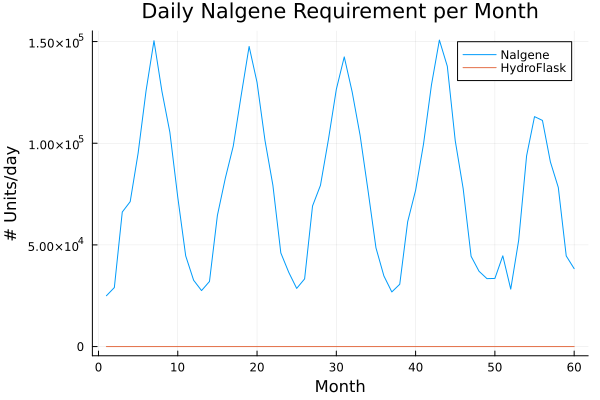

In [222]:
optimize!(Bottle_Alternative_Model);

#Isolate the necessary HydroFlask and Nalgene requirement per day
H_new = value.(H); 
H_new_array = convert(Array, H_new);

N_new = value.(N);
N_new_array = convert(Array, N_new);

plot(N_new_array, label = "Nalgene")
plot!(H_new_array, label = "HydroFlask")
title!("Daily Nalgene Requirement per Month")
xlabel!("Month");
ylabel!("# Units/day")

Next, we will model the results of bottle optimization if only cost per unit is considered. 

In [223]:
#Model to test carbon tax sensitivity
C_env_NEW = 10000;
Bottle_Alternative_Model_2 = Model(HiGHS.Optimizer);

I = 1:60;
@variable(Bottle_Alternative_Model_2, N_2[i in I] >= 0);
@variable(Bottle_Alternative_Model_2, H_2[i in I] >= 0);

@objective(Bottle_Alternative_Model_2, Min, sum(C_H .* H_2) + sum(C_N .* N_2) + sum(C_env_NEW .* H_env .* H_2) + sum(C_env_NEW .* N_env .* N_2));
#Constraints to ensure a positive value of Nalgenes and HydroFlasks
@constraint(Bottle_Alternative_Model_2, Positive_1_2[i in I], N_2[i] >= 0);
@constraint(Bottle_Alternative_Model_2, Positive_2_2[i in I], H_2[i] >= 0);

#Constraint to ensure that all water bottle demand is met on a daily basis.
@constraint(Bottle_Alternative_Model_2, Satisfied_Demand_2[i in I], National_Park_Demand_Daily[i] .- (N_2[i] .+ H_2[i]) == 0);

#Constraint to ensure that the optimized model does not increase the total CO2 emissions released compared to the 
#single use bottle case. This takes into account the "discount" on emissions given how many DPWBs the alternatives replace.
@constraint(Bottle_Alternative_Model_2, Emissions_Constraint_2, 30 .* (N_env .* N_2 ./ 13.92  + H_env .* H_2 ./ 121.67) <= Emissions_DPWBs);

In [224]:
optimize!(Bottle_Alternative_Model_2);
value.(H_2)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-240); columns 0(-120); elements 0(-360) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  9.2807190765e+07
HiGHS run time      :          0.00


1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, 1:60
And data, a 60-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

The results of running the optimization with an extremely high carbon tax indicate that regardles of the tax, Nalgene are still the best option. 

In [232]:
#Determine the number of Nalgene required for purchase to meet the maximum demand
Max_Demand = findmax(N_new_array)
println("Total Number of Nalgene Required for Purchase: ", ceil(Max_Demand[1]))

#Determine total cost
Total_Cost = Max_Demand[1] * C_N;
println("Total Cost for Nalgene Purchased: ", round(Total_Cost, digits = 2), " Dollars")

#Determine the equivalen emissions of purchased Nalgene
Emissions = Max_Demand[1]/13.92 .* N_env;
println("Total Emissions Generated due to Nalgene Purchase: ", round(Emissions, digits = 2), " MT CO2")
Carbon_Tax = C_env * Emissions;
println("Cost for Emissions: ", round(Carbon_Tax, digits=2), " Dollars")
println()

#Calculate cumulative total cost of using DPWBs (not considering volume discount)
Cost_DPWBs = sum(1.5 .* National_Park_Demand)
println("Total cost for DPWB purchased: ", round(Cost_DPWBs, digits = 2), " Dollars")

#Calculate percent savings of using Nalgene
Cost_Savings = (Cost_DPWBs - Total_Cost)/Cost_DPWBs;
println("% Cost Saved Using Nalgene: ", round(Cost_Savings * 100, digits = 2), "%")

#Calculate cumulative total emissions of using single use water bottles
DPWB_Emissions = round(sum(Emissions_DPWBs), digits = 2);
println("Total Carbon Emissions of using DPWBs: ", DPWB_Emissions, " MT CO2")

#Calculate percent carbon savings
Carbon_Saved = (DPWB_Emissions - Emissions)/DPWB_Emissions;
println("% Carbon Saved Using Nalgene: ", round(Carbon_Saved * 100, digits = 2), "%")

Total Number of Nalgene Required for Purchase: 150726.0
Total Cost for Nalgene Purchased: 2.56082681e6 Dollars
Total Emissions Generated due to Nalgene Purchase: 3.36 MT CO2
Cost for Emissions: 83.92 Dollars

Total cost for DPWB purchased: 2.07880716e8 Dollars
% Cost Saved Using Nalgene: 98.77%
Total Carbon Emissions of using DPWBs: 13858.71 MT CO2
% Carbon Saved Using Nalgene: 99.98%


Our study concludes that, with their lower emissions and cost per unit, the Nalgene's lower DPWB equivalency is compensated for. Thus, using a Nalgene is, if individuals ensure continued use as specified in our model, the optimal choice from both a cost and environmental perspective. Additionally, a caveat to our study is that cost minimization is on a whollistic basis rather than per unit. The total spending required for water bottles decreases when the parks choose HydroFlask. However, this does not mean that the up-front, per unit cost decreases. 

We are also assuming that, after all recreational visitors have entered and exited the park, the necessary water bottles can be washed and reused the next day. Thus, the total number of water bottles required for purchase should be able to meet the maximum possible demand. This we determined to be 150,726 visitors in a day across all parks. 